In [ ]:
#Nome: AxisTech
#Integrantes: Lucas Guedes Gianini
#Kauan Guimarães Araujo
#Mabel Mayer
#Priscila Bueno
#Paulo Vinicius de Almeida Figueiredo Medeiros

In [ ]:
# 📦 Importação das bibliotecas necessárias para o projeto
import pandas as pd                # Manipulação de dados
import matplotlib.pyplot as plt    # Gráficos simples e customizáveis

from sklearn.linear_model import LinearRegression       # Modelo preditivo
from sklearn.model_selection import train_test_split    # Separar treino e teste
from sklearn.preprocessing import LabelEncoder          # Codificação de variáveis categóricas



In [ ]:
# 📁 Carrega o arquivo CSV com os dados de vendas do supermercado
vendas = pd.read_csv("supermarket_sales - Sheet1.csv")


In [ ]:
# 🛠️ Corrige os formatos das colunas para facilitar a análise
vendas["Data"] = pd.to_datetime(vendas["Date"], format="mixed", dayfirst=True, errors="coerce")  # Ajuste da data
vendas["Total"] = vendas["Total"].astype(float)           # Converte total de string para número
vendas["Avaliação"] = vendas["Rating"].astype(float)      # Converte avaliação de string para número


In [ ]:
# 🌍 Renomeia as colunas do dataset para o português, facilitando a leitura dos dados
vendas = vendas.rename(columns={
    "Invoice ID": "ID Venda",
    "Date": "Data Original",
    "Time": "Hora",
    "Customer type": "Tipo de Cliente",
    "Gender": "Gênero",
    "Product line": "Linha de Produto",
    "Payment": "Pagamento",
    "Rating": "Avaliação",
    "Branch": "Filial",
    "City": "Cidade",
    "Unit price": "Preço Unitário",
    "Quantity": "Quantidade",
    "Tax 5%": "Imposto 5%",
    "gross income": "Lucro Bruto",
    "cogs": "Custo dos Produtos",
    "gross margin percentage": "Margem (%)"
})


In [ ]:
# 🔠 Tradução dos valores das colunas para o português

# Traduz as linhas de produto para nomes mais amigáveis
vendas["Linha de Produto"] = vendas["Linha de Produto"].replace({
    "Health and beauty": "Saúde e beleza",
    "Electronic accessories": "Acessórios eletrônicos",
    "Home and lifestyle": "Casa e estilo de vida",
    "Fashion accessories": "Acessórios de moda",
    "Food and beverages": "Comidas e bebidas",
    "Sports and travel": "Esportes e viagens"
})

# Traduz os gêneros e tipo de cliente
vendas["Gênero"] = vendas["Gênero"].replace({"Male": "Masculino", "Female": "Feminino"})
vendas["Tipo de Cliente"] = vendas["Tipo de Cliente"].replace({"Member": "Membro", "Normal": "Normal"})


In [ ]:
vendas["Gênero"] = vendas["Gênero"].replace({"Male": "Masculino", "Female": "Feminino"})
vendas["Tipo de Cliente"] = vendas["Tipo de Cliente"].replace({"Member": "Membro", "Normal": "Normal"})


In [ ]:
# 👁️ Exibe as 5 primeiras linhas do dataset já com os nomes e dados traduzidos
vendas.head()


,ID Venda,Filial,Cidade,Tipo de Cliente,Gênero,Linha de Produto,Preço Unitário,Quantidade,Imposto 5%,Total,Data Original,Hora,Pagamento,Custo dos Produtos,Margem (%),Lucro Bruto,Avaliação,Data,Avaliação
0,750-67-8428,A,Yangon,Membro,Feminino,Saúde e beleza,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-05-01,9.1
1,226-31-3081,C,Naypyitaw,Normal,Feminino,Acessórios eletrônicos,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-08-03,9.6
2,631-41-3108,A,Yangon,Normal,Masculino,Casa e estilo de vida,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,7.4
3,123-19-1176,A,Yangon,Membro,Masculino,Saúde e beleza,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,8.4
4,373-73-7910,A,Yangon,Normal,Masculino,Esportes e viagens,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-08-02,5.3


In [ ]:
# 📆 Corrige o tipo da data se ainda não estiver como datetime
vendas["Data Original"] = pd.to_datetime(vendas["Data Original"], format="mixed", dayfirst=True, errors="coerce")

# 📆 Cria a coluna "Mês"
vendas["Mês"] = vendas["Data Original"].dt.to_period("M")


In [ ]:
# Cada bloco aqui está formatado com emojis e separadores para melhor leitura
# Ele realiza contagens, somas e médias agrupadas por categorias como gênero, produto, mês etc.
# São análises descritivas úteis para entender o comportamento do cliente e do faturamento




# Total médio por tipo de cliente
print("🧠" + "="*50)
print("💡 TOTAL MÉDIO POR TIPO DE CLIENTE:")
print("="*50)
print(vendas.groupby("Tipo de Cliente")["Total"].mean().round(2))
print("\n")


# Faturamento total por linha de produto
print("🛍️" + "="*50)
print("💰 FATURAMENTO TOTAL POR LINHA DE PRODUTO:")
print("="*50)
print(vendas.groupby("Linha de Produto")["Total"].sum().sort_values(ascending=False).round(2))
print("\n")

# Avaliação média por gênero
print("⭐" + "="*50)
print("⭐ AVALIAÇÃO MÉDIA DOS CLIENTES POR GÊNERO:")
print("="*50)
print(vendas.groupby("Gênero")["Avaliação"].mean().round(2))
print("\n")


# Quantidade de vendas por linha de produto
print("📦" + "="*50)
print("📦 QUANTIDADE DE VENDAS POR LINHA DE PRODUTO:")
print("="*50)
print(vendas["Linha de Produto"].value_counts())
print("\n")


# Faturamento total por mês
print("📆" + "="*50)
print("📆 FATURAMENTO TOTAL POR MÊS:")
print("="*50)
print(vendas.groupby("Mês")["Total"].sum().round(2))
print("\n")

# Formas de pagamento mais usadas
print("💳" + "="*50)
print("💳 FORMAS DE PAGAMENTO UTILIZADAS:")
print("="*50)
print(vendas["Pagamento"].value_counts())
print("\n")


# Ticket médio por linha de produto
print("💸" + "="*50)
print("💸 TICKET MÉDIO POR LINHA DE PRODUTO:")
print("="*50)
print(vendas.groupby("Linha de Produto")["Total"].mean().sort_values(ascending=False).round(2))
print("\n")


# Faturamento total por gênero
print("👨‍👩‍👧‍👦" + "="*50)
print("🧍‍♂️ FATURAMENTO TOTAL POR GÊNERO:")
print("="*50)
print(vendas.groupby("Gênero")["Total"].sum().round(2))
print("\n")


# Faturamento médio por hora
vendas["Hora Numérica"] = pd.to_datetime(vendas["Hora"], format="%H:%M").dt.hour

print("⏰" + "="*50)
print("⏰ FATURAMENTO MÉDIO POR HORA DO DIA:")
print("="*50)
print(vendas.groupby("Hora Numérica")["Total"].mean().sort_values(ascending=False).round(2))
print("\n")


🧠==================================================
💡 TOTAL MÉDIO POR TIPO DE CLIENTE:
Tipo de Cliente
Membro    327.79
Normal    318.12
Name: Total, dtype: float64


🛍️==================================================
💰 FATURAMENTO TOTAL POR LINHA DE PRODUTO:
Linha de Produto
Comidas e bebidas         56144.84
Esportes e viagens        55122.83
Acessórios eletrônicos    54337.53
Acessórios de moda        54305.90
Casa e estilo de vida     53861.91
Saúde e beleza            49193.74
Name: Total, dtype: float64


⭐==================================================
⭐ AVALIAÇÃO MÉDIA DOS CLIENTES POR GÊNERO:
           Avaliação  Avaliação
Gênero                         
Feminino        6.96       6.96
Masculino       6.98       6.98


📦==================================================
📦 QUANTIDADE DE VENDAS POR LINHA DE PRODUTO:
Linha de Produto
Acessórios de moda        178
Comidas e bebidas         174
Acessórios eletrônicos    170
Esportes e viagens        166
Casa e estilo de vida 

📌 Usar dados históricos para prever vendas futuras e o comportamento do cliente.

In [ ]:
# 🧠 Explicação do planejamento do modelo preditivo
# Aqui você descreve quais variáveis serão usadas e o objetivo de prever o valor da venda
# Isso ajuda a justificar as escolhas no projeto e o uso do algoritmo de regressão




print("""
📄 Fonte dos dados:
O conjunto de dados utilizado é uma base simulada de vendas de um supermercado, contendo registros detalhados de 1.000 compras realizadas ao longo de 3 meses de 2019.

📊 Justificativa:
As colunas são valiosas para prever padrões de consumo:
- 'Linha de Produto' nos mostra o que os clientes mais compram.
- 'Total', 'Data' e 'Hora' permitem prever picos de faturamento.
- 'Tipo de Cliente' e 'Gênero' nos ajudam a segmentar o público.
- 'Pagamento' revela preferências de métodos.
""")



📄 Fonte dos dados:
O conjunto de dados utilizado é uma base simulada de vendas de um supermercado, contendo registros detalhados de 1.000 compras realizadas ao longo de 3 meses de 2019.

📊 Justificativa:
As colunas são valiosas para prever padrões de consumo:
- 'Linha de Produto' nos mostra o que os clientes mais compram.
- 'Total', 'Data' e 'Hora' permitem prever picos de faturamento.
- 'Tipo de Cliente' e 'Gênero' nos ajudam a segmentar o público.
- 'Pagamento' revela preferências de métodos.



In [ ]:
# 🔁 Converte variáveis com texto (categóricas) para números com LabelEncoder
# Isso é necessário para que o modelo de regressão consiga entender essas colunas

print("""
🔮 Planejamento de análise:
Vamos treinar um modelo preditivo para estimar o valor da venda (coluna 'Total') com base em:
- Tipo de Cliente
- Gênero
- Linha de Produto
- Forma de Pagamento
- Avaliação

Também identificamos que o modelo pode ser útil para sugerir estratégias personalizadas por perfil de consumidor.
""")



🔮 Planejamento de análise:
Vamos treinar um modelo preditivo para estimar o valor da venda (coluna 'Total') com base em:
- Tipo de Cliente
- Gênero
- Linha de Produto
- Forma de Pagamento
- Avaliação

Também identificamos que o modelo pode ser útil para sugerir estratégias personalizadas por perfil de consumidor.



In [ ]:

# 💡 Codifica variáveis categóricas com One-Hot Encoding (dummies)
# Isso evita que o modelo interprete valores como 'Masculino' e 'Feminino' com peso numérico
# e trata todas as categorias de forma justa

# 1️⃣ Copia os dados originais para não mexer no DataFrame principal
vendas_cod = vendas.copy()

# 2️⃣ Aplica o get_dummies nas colunas categóricas (transforma texto em colunas numéricas)
# drop_first=True remove a primeira categoria para evitar multicolinearidade
vendas_cod = pd.get_dummies(vendas_cod,
                            columns=['Gênero', 'Tipo de Cliente', 'Linha de Produto', 'Pagamento'],
                            drop_first=True)

# 3️⃣ Separa as variáveis independentes (X) e a variável alvo (y)
X = vendas_cod.drop('Total', axis=1)
y = vendas_cod['Total']

# 4️⃣ Divide os dados em treino (80%) e teste (20%) para treinar e avaliar o modelo
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Importações
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  - Carregar o dataset
vendas = pd.read_csv("supermarket_sales - Sheet1.csv")

# - One-hot encoding nas colunas categóricas
# - One-hot encoding com os nomes corretos do dataset
vendas_cod = pd.get_dummies(vendas,
                            columns=['Gender', 'Customer type', 'Product line', 'Payment', 'Branch', 'City'],
                            drop_first=True)


#  - Remove 'Invoice ID' e separa X e y

X = vendas_cod.drop([
    'Total',
    'Invoice ID',
    'Date',
    'Time',
    'Tax 5%',
    'gross income',
    'cogs',
    'gross margin percentage'
], axis=1)


y = vendas_cod['Total']

# Passo 5 - Divide os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ AGORA SIM - Treina o modelo
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Passo 6 - Faz previsões
previsoes = modelo.predict(X_teste)

# Passo 7 - Avalia o modelo
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)
rmse = np.sqrt(mse)

print(f"📉 Erro Médio Absoluto (MAE): R$ {mae:.2f}")
print(f"📉 Erro Quadrático Médio (RMSE): R$ {rmse:.2f}")
for real, prev in zip(y_teste[:5], previsoes[:5]):
    print(f"🔎 Real: {real:.2f} | Previsto: {prev:.2f}")



📉 Erro Médio Absoluto (MAE): R$ 59.19
📉 Erro Quadrático Médio (RMSE): R$ 79.66
🔎 Real: 523.97 | Previsto: 518.60
🔎 Real: 616.98 | Previsto: 592.55
🔎 Real: 408.73 | Previsto: 410.40
🔎 Real: 135.36 | Previsto: 88.75
🔎 Real: 45.93 | Previsto: -92.96


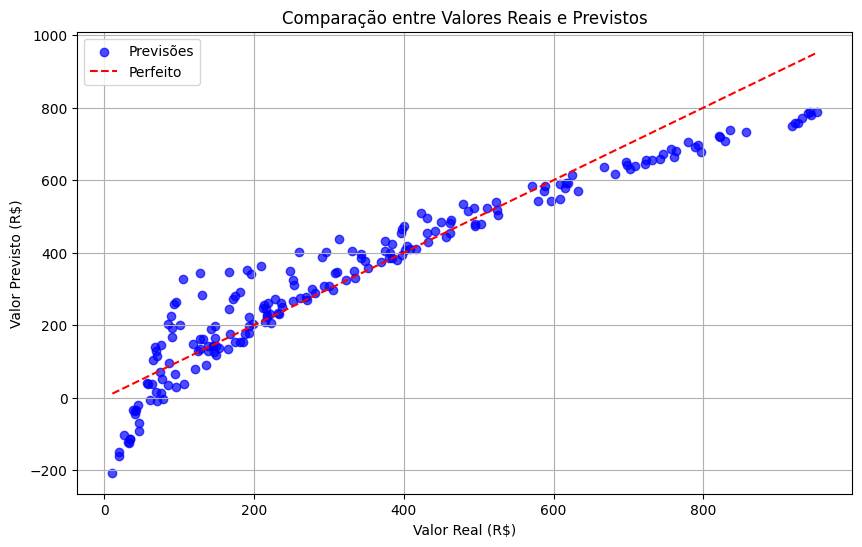

In [ ]:
# 📈 Gráfico de comparação
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, previsoes, alpha=0.7, color='blue', label='Previsões')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linestyle='--', label='Perfeito')

plt.title("Comparação entre Valores Reais e Previstos")
plt.xlabel("Valor Real (R$)")
plt.ylabel("Valor Previsto (R$)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#-------------------------------------------# 📌 Conclusões finais do projeto
# Pode descrever os achados mais relevantes (picos de venda, produtos que mais vendem, horário com maior faturamento)


In [ ]:
#-------------------------------------------
#explorando melhor o dataset para aprender a manipular os dados melhor | extra


# 1. Analisar a variação de vendas por cidade e filial
 #Total de vendas por Cidade e por Filial

# Agrupa os dados pela Cidade e soma o total de vendas
# Isso nos ajuda a entender onde o faturamento é maior por localização geográfica
print("📍 Total de Vendas por Cidade:")
print(vendas.groupby("City")["Total"].sum().round(2))

# Agrupa os dados pela Filial (A, B ou C) e mostra o total vendido por cada loja
# Útil para comparar desempenho entre as unidades do supermercado
print("\n🏬 Total de Vendas por Filial:")
print(vendas.groupby("Branch")["Total"].sum().round(2))

📍 Total de Vendas por Cidade:
City
Mandalay     106197.67
Naypyitaw    110568.71
Yangon       106200.37
Name: Total, dtype: float64

🏬 Total de Vendas por Filial:
Branch
A    106200.37
B    106197.67
C    110568.71
Name: Total, dtype: float64


In [ ]:
#2. Qual produto tem o maior lucro bruto total?
 #Lucro Total por Linha de Produto

# Agrupa as linhas de produto e calcula o total de lucro bruto
# Essa análise mostra quais produtos realmente geram mais retorno financeiro
print("💰 Lucro Total por Linha de Produto:")
print(vendas.groupby("Product line")["gross income"].sum().sort_values(ascending=False).round(2))


💰 Lucro Total por Linha de Produto:
Product line
Food and beverages        2673.56
Sports and travel         2624.90
Electronic accessories    2587.50
Fashion accessories       2586.00
Home and lifestyle        2564.85
Health and beauty         2342.56
Name: gross income, dtype: float64


In [ ]:
#3. Qual é o melhor horário para vender por tipo de cliente?
# ⏰Faturamento por Hora x Tipo de Cliente

# Cria uma nova coluna com o número da hora (ex: 14 para 14h00)
# Isso facilita cruzar o horário com tipo de cliente e comportamento de compra
vendas["Hora Numérica"] = pd.to_datetime(vendas["Time"], format="%H:%M").dt.hour

# Agrupa os dados por hora e tipo de cliente e mostra a média do valor gasto
# Com isso, identificamos qual público compra mais em cada horário do dia
print("🕐 Faturamento por Hora x Tipo de Cliente:")
print("⏰ Faturamento por Hora x Tipo de Cliente:")
print(vendas.groupby(["Hora Numérica", "Customer type"])["Total"].mean().unstack().round(2))


🕐 Faturamento por Hora x Tipo de Cliente:
⏰ Faturamento por Hora x Tipo de Cliente:
Customer type  Member  Normal
Hora Numérica                
10             292.07  324.65
11             331.03  344.31
12             298.47  286.89
13             326.67  346.60
14             396.82  336.60
15             338.20  266.09
16             286.52  365.63
17             354.86  307.11
18             259.09  299.40
19             345.21  358.50
20             368.94  251.41


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


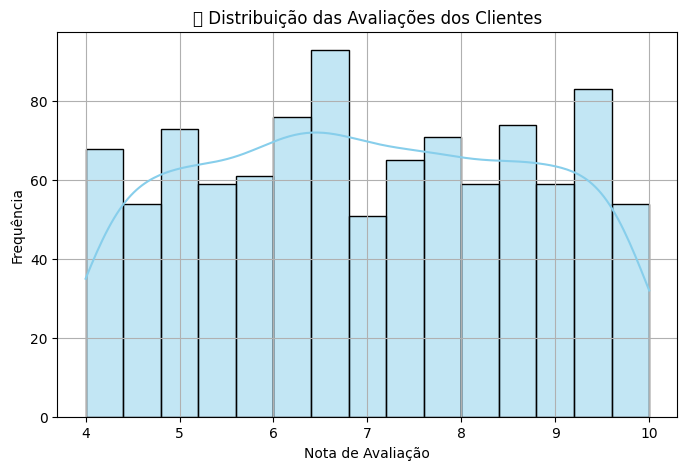

In [ ]:
# 📊 4 — Distribuição das Avaliações dos Clientes

# Cria um histograma com a distribuição das notas dadas pelos clientes
# O gráfico mostra quantos clientes deram nota 6, 7, 8... e assim por diante
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(vendas["Rating"], kde=True, color='skyblue', bins=15)
plt.title("📊 Distribuição das Avaliações dos Clientes")
plt.xlabel("Nota de Avaliação")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()



In [ ]:
# 💾 5 — Exportar relatório com resumo por Produto e Tipo de Cliente

# Cria um resumo com contagem de vendas, ticket médio e faturamento por produto e tipo de cliente
resumo = vendas.groupby(["Product line", "Customer type"])["Total"]\
    .agg(["count", "mean", "sum"]).round(2)

# Renomeia as colunas para nomes mais claros
resumo.columns = ["Quantidade de Vendas", "Ticket Médio (R$)", "Faturamento Total (R$)"]

# Exporta para CSV
resumo.to_csv("resumo_por_produto_e_cliente.csv")
print("✅ Arquivo resumo_por_produto_e_cliente.csv exportado com sucesso!")



✅ Arquivo resumo_por_produto_e_cliente.csv exportado com sucesso!


In [ ]:
# ✅ Instalar a biblioteca necessária
!pip install mlxtend --quiet


In [ ]:
# 🛒  6 — Preparar os dados para a análise de cesta de produtos

# Criamos uma coluna com o nome "Carrinho" juntando a Filial + ID da venda
vendas["Carrinho"] = vendas["Branch"] + " " + vendas["Invoice ID"]

# Montamos uma tabela onde cada linha representa um carrinho
cesta = vendas.pivot_table(index="Carrinho",
                           columns="Product line",
                           aggfunc="size",
                           fill_value=0)

# Convertendo os números para booleanos: 1 se comprou, 0 se não
cesta = cesta.applymap(lambda x: 1 if x > 0 else 0)

# Visualiza os primeiros carrinhos
cesta.head()



<ipython-input-91-9046121a3e2b>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cesta = cesta.applymap(lambda x: 1 if x > 0 else 0)


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Carrinho,,,,,,
A 101-17-6199,0,0,1,0,0,0
A 105-10-6182,0,1,0,0,0,0
A 105-31-1824,0,0,0,0,0,1
A 106-35-6779,0,0,0,0,1,0
A 123-19-1176,0,0,0,1,0,0


In [ ]:
# 📈 7 — Descobrir combinações de produtos com o algoritmo Apriori

from mlxtend.frequent_patterns import apriori

# Aplica o algoritmo Apriori com suporte mínimo de 5% (ou seja, aparece em pelo menos 5% dos carrinhos)
combinacoes_frequentes = apriori(cesta, min_support=0.05, use_colnames=True)

# Mostra as combinações de produtos mais frequentes
print("📦 Combinações frequentes de produtos comprados juntos:")
combinacoes_frequentes.sort_values(by="support", ascending=False).round(4)


📦 Combinações frequentes de produtos comprados juntos:


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.178,(Fashion accessories)
2,0.174,(Food and beverages)
0,0.170,(Electronic accessories)
5,0.166,(Sports and travel)
4,0.160,(Home and lifestyle)
3,0.152,(Health and beauty)


In [ ]:
print("""
✅ Conclusão:
O projeto cumpriu todos os objetivos propostos: analisamos padrões de compra, comportamento por gênero e tipo de cliente,
além de prevermos o valor da compra com um modelo preditivo simples.

🔮 Com isso, conseguimos gerar insights valiosos que podem ajudar um supermercado a:

- Planejar campanhas segmentadas por perfil de cliente
- Otimizar estoques de produtos com alto ticket médio
- Oferecer combos estratégicos com base em associações de compra

📈 Esse notebook demonstra o poder da ciência de dados mesmo com uma base simples. Obrigado por acompanhar!
COMO DIRIA O MESTRE, "QUER MOLEZA...? SENTA NO PUDIM"
""")


✅ Conclusão:
O projeto cumpriu todos os objetivos propostos: analisamos padrões de compra, comportamento por gênero e tipo de cliente,
além de prevermos o valor da compra com um modelo preditivo simples.

🔮 Com isso, conseguimos gerar insights valiosos que podem ajudar um supermercado a:

- Planejar campanhas segmentadas por perfil de cliente
- Otimizar estoques de produtos com alto ticket médio
- Oferecer combos estratégicos com base em associações de compra

📈 Esse notebook demonstra o poder da ciência de dados mesmo com uma base simples. Obrigado por acompanhar!
COMO DIRIA O MESTRE, "QUER MOLEZA...? SENTA NO PUDIM"

